# 多项式函数拟合实验

In [46]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys

## 生成数据集
 

y=1.2x-3.4x^2+5.6x^3+5+c

In [47]:
n_train,n_test,true_w,true_b=100,100,[1.2,-3.4,5.6],5
features=torch.randn((n_train+n_test),1)
poly_featrues=torch.cat((features,torch.pow(features,2),torch.pow(features,3)),1)
labels=(true_w[0]*poly_featrues[:,0]+true_w[1]*poly_featrues[:,1]+true_w[2]*poly_featrues[:,2]+true_b)
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float)

In [48]:
features[:2],poly_featrues[:2],labels[:2]

(tensor([[-0.1572],
         [ 0.3808]]),
 tensor([[-0.1572,  0.0247, -0.0039],
         [ 0.3808,  0.1450,  0.0552]]),
 tensor([4.7068, 5.2843]))

## 定义、训练和测试模型

In [49]:
def semilogy(x_vals,y_vals,x_label,y_label,x2_vals=None,y2_vals=None,legend=None):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals,y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals,y2_vals,linestyle=':')
        plt.legend(legend)


In [50]:
num_epoches,loss=100,torch.nn.MSELoss()
def fit_and_plot(train_features,test_features,train_labels,test_labels):
    net=torch.nn.Linear(train_features.shape[-1],1)
    batch_size=min(10,train_labels.shape[0])
    dataset=torch.utils.data.TensorDataset(train_features,train_labels)
    train_iter=torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)
    optimizer=torch.optim.SGD(net.parameters(),lr=0.01)
    train_ls,test_ls=[],[]
    for _ in range(num_epoches):
        for X,y in train_iter:
            l=loss(net(X),y.view(-1,1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels=train_labels.view(-1,1)
        test_labels=test_labels.view(-1,1)
        train_ls.append(loss(net(train_features),train_labels).item())
        test_ls.append(loss(net(test_features),test_labels).item())
    print('final epoch:train loss',train_ls[-1],'test loss',test_ls[-1])
    semilogy(range(1,num_epoches+1),train_ls,'epochs','loss',range(1,num_epoches+1),test_ls,['train','test'])
    print('weight:',net.weight.data,'\nbias:',net.bias.data)

### 三阶多项式函数拟合（正常）

final epoch:train loss 0.0012453262461349368 test loss 0.0051558599807322025
weight: tensor([[ 1.2451, -3.3556,  5.5774]]) 
bias: tensor([4.9651])


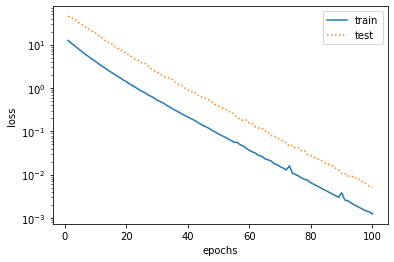

In [51]:
fit_and_plot(poly_featrues[:n_train,:],poly_featrues[n_train:,:],labels[:n_train],labels[n_train:])

### 线性函数拟合（欠拟合）

final epoch:train loss 84.434814453125 test loss 152.23355102539062
weight: tensor([[13.4766]]) 
bias: tensor([4.2296])


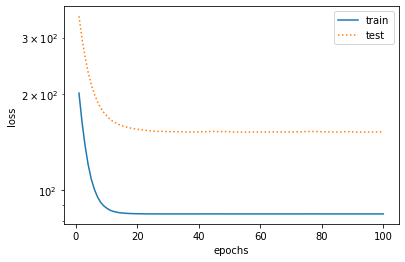

In [52]:
fit_and_plot(features[:n_train,:],features[n_train:,:],labels[:n_train],labels[n_train:])

### 训练样本不足（过拟合）

final epoch:train loss 0.4796171486377716 test loss 376.3791809082031
weight: tensor([[0.4768, 0.5187, 0.3582]]) 
bias: tensor([4.2068])


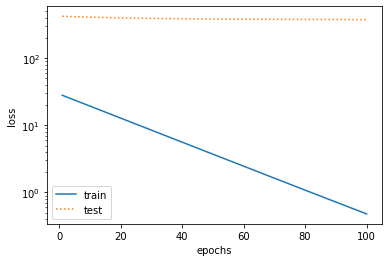

In [53]:
fit_and_plot(poly_featrues[0:2,:],poly_featrues[n_train:,:],labels[0:2],labels[n_train:])